**Autor: Gustavo Henrique Reis de Araújo Lima**

**Instituição: CEFET - MG - Unidade Contagem**

**(feito em Julia 1.4)**

**Última atualização: 06/05/2020**

**Requisitos: Plots.jl, LaTeXStrings.jl**

***
# **1. Cinemática**

## **1.3 Movimento Retilíneo Uniformemente Variado (MRUV)**

### **1.3.6 Queda-livre**

Um tipo de movimento muito comum no nosso dia-a-dia e que pode ser considerado como MRUV é o movimento que um objeto tem quando cai. Quando a altura da queda do objeto é pequena, podemos considerar que a aceleração do objeto é constante, ou seja, é um MRUV. Esse tipo de movimento é chamado de queda-livre.

A aceleração de um objeto é queda-livre é igual a aceleração da gravidade $g$. A aceleração da gravidade não é uma constante, ela depende do local em que é medida, e vários fatores influenciam em seu valor, dentre estes os principais são a latitute e a altitude do local em que é medida. De acordo com Hirt e colaboradores (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/grl.50838), a região na superfície da Terra com a menor aceleração da gravidade está no Monte Nevado Huascarán no Peru, onde $g_{\rm min} = 9,\!7639\,{\rm m/s^2}$; já a região na superfície da Terra com a maior aceleração gravitacional está no Oceano Ártico e vale $g_{\rm max} = 9,\!8337\,{\rm m/s^2}$. A aceleração da gravidade foi medida no Departamento de Física da UFMG em 1981 (http://lilith.fisica.ufmg.br/dsoares/g/g.htm) e tem um valor igual a $g = 9,\!7838163 \pm 4\times10^{-7}{\rm m/s^2}$. O valor média da aceleração da gravidade na superfície da Terra é:

$$g \approx 9,\!81\,{\rm m/s^2},$$

e esse é o valor de $g$ que será utilizado aqui. 

Para estudar o movimento de queda-livre, vamos considerar que a posição do objeto aumenta com sua altura, ou seja, na direção vertical o sentido positivo é para cima, e o negativo para baixo. Já a aceleração da gravidade sempre acelera os objetos na direção vertical, puxando os objetos para baixo, portanto, age no sentido negativo. Vamos ver como as equações do MRUV ficam para a queda-livre:

* posição vertical em função do tempo, $h(t)$:

$$h(t) = h_0 + v_{0y} \cdot t - \frac{g \cdot t^2}{2},$$

onde $h_0$ é a altura inicial do objeto e $v_{0y}$ é a velocidade vertical inicial. Se o objeto começa seu movimento subindo, $v_{0y} > 0$, e se o objeto começa seu movimento descendo, $v_{0y} < 0$;

* velocidade vertical em função do tempo, $v_{y}(t)$:

$$v_{y}(t) = v_{0y} - g \cdot t;$$

* variação da altura entre os instantes $t_1$ e $t_2$, $\Delta h_{12}$, utilizando a equação de Torricelli:

$$\Delta h_{12} = \frac{v_{1}^{2} - v_{2}^{2}}{2g}.$$

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
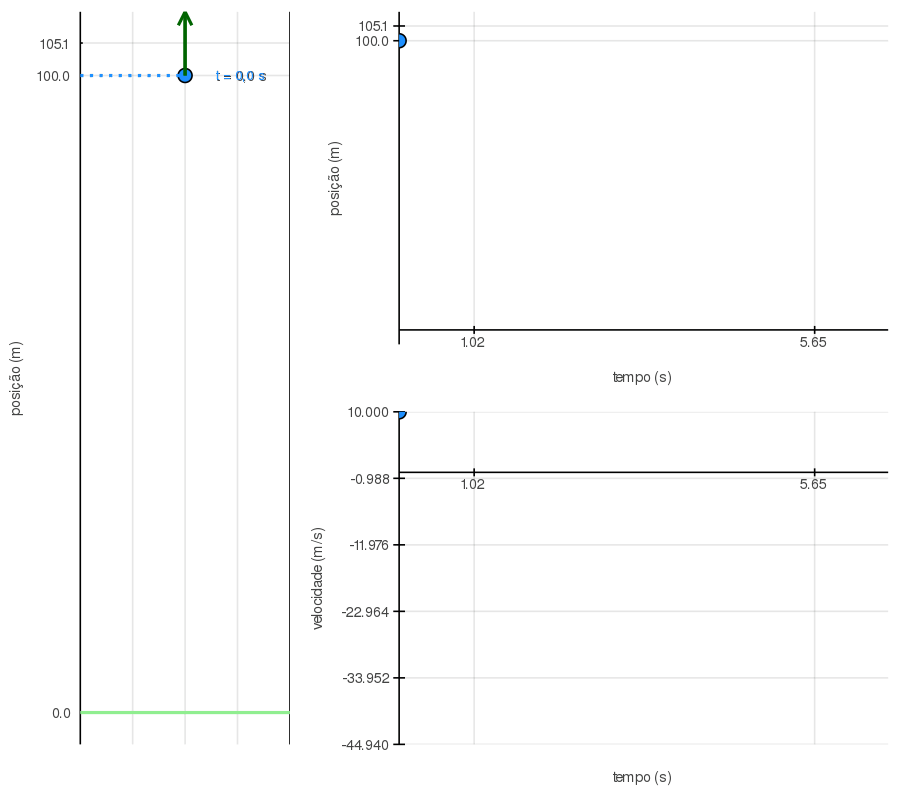

In [3]:
using Plots
using LaTeXStrings
using Printf

#esta função calcula a altura e a velocidade no movimento de queda-livre
#o objeto para ao atingir o chão (h = 0).
function queda(s0::Real,v0::Real,a::Real,t::Real)
    alt = s0 + v0*t + (a*t^2)/2
    vel = v0 + a*t
    (alt < 0) && (alt = zero(Float64); vel = zero(Float64))
    return alt,vel
end

#definindo função para trocar ponto decimal por vírgula decimal nas strings em latex
function pontoVirgula(a::LaTeXString)
    b = replace(a, "." => ",\\!")
    return b
end

#definindo características padrões para os gráficos
default(grid = true, markersize = 8, framestyle = :origin, linewidth = 3, legend = :false)

#intervalo entre dois instantes de tempo consecutivos
dt = 0.05

#modifique esses valores para observar como eles influenciam no MRUV
h0 = 100  #altura inicial
vy0 = 10  #velocideda inicial
g = -9.81 #aceleração da gravidade

#descobrindo instante de tempo em que o objeto atinge o chão
Δ = vy0^2 - 2*g*h0
tmp_1 = (-vy0 - sqrt(Δ))/(g)
tmp_2 = (-vy0 + sqrt(Δ))/(g)
t_max = round(max(tmp_1, tmp_2), digits= 2)

#descobrindo o instante de tempo em que o objeto está no ponto mais alto de sua trajetória
t_hmax = round(-vy0/g, digits = 2)

#vetor com instantes de tempo utilizados na animação
t_ani = 0:dt:(t_max + 1)

#criando vetores com as posições e velocidades do objetos nos instantes de tempo em t_ani
h_ani = []
vy_ani = []
for t ∈ t_ani
    qd = queda(h0,vy0,g,t)
    h_ani = push!(h_ani, qd[1])
    vy_ani = push!(vy_ani, qd[2])
end

#altura máxima em h_ani
h_max = round(maximum(h_ani), digits = 2)

#definindo limites do eixo de posição
hlim = (-5, ceil(h_max, digits = -1))

#definindo marcações no eixo que representa a altura
hticks = [0, h0, h_max]

#o objeto está parado em relação à direção x
x_ani = zeros(size(t_ani,1))

#velocidade máxima
vy_max = round(maximum(vy_ani), digits = 2)

#velocidade mínima
vy_min = round(minimum([vy_ani;0]), digits = 2)

#inicializando vetores utilizados para marcar posição e tempo na animação
xpace = []
ypace= []
time_ann = []

#tticks = vcat(range(0, t_ani[end], length = 5), t_hmax)
tticks = [0,t_hmax,t_max]

#loop para criação da animação
@gif for i = 1:size(t_ani,1)
        
    #anotação de tempo acima do objeto em movimento
    tstr = @sprintf("t = %3.1f s", t_ani[i])
    tstr = replace(tstr, "." => ",")
    ann_t = [(1.5, h_ani[i], text(tstr, pointsize = 10, halign = :left))]
    
    #animação do movimento do objeto com seu vetor velocidade
    p1 = plot([-5,5],[0,0], lw = 3, color = :lightgreen)
    scatter!([x_ani[i]], [h_ani[i]], marker = :circle, color = :dodgerblue,
        yaxis = ("posição (m)", hlim, hticks, font(10)),
        xlims = (-5,5), xaxis = (showaxis = :off), framestyle = :box, ann = ann_t)
    quiver!([x_ani[i]], [h_ani[i]], quiver = ([0],[vy_ani[i]]), lw = 3, color = :darkgreen)
    
    
    #definindo os pontos que serão utilizados na marcação da distância e do tempo
    if (t_ani[i] % 4) == 0
        push!(ypace,[h_ani[i],h_ani[i]])
        push!(xpace,[-5,0])
        push!(time_ann,(1.5,h_ani[i],text(tstr, pointsize = 9, color = :dodgerblue, halign = :left)))
    end
    
    #criando marcações na animação do movimento do objeto
    plot!(xpace,ypace, lw = 3, linestyle = :dot, color = :dodgerblue, ann = time_ann)
    
    #animação da posição do objeto em função do tempo
    p2 = scatter([t_ani[i]],[h_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("posição (m)", hlim, hticks, font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],h_ani[1:i], lw = 3, ls = :dash, color = :red, alpha = 0.5)
    
    #animação da velocidade do objeto em função do tempo
    p3 = scatter([t_ani[i]],[vy_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), tticks, font(10)),
        yaxis = ("velocidade (m/s)", (vy_min,vy_max), range(vy_min, vy_max, length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],vy_ani[1:i], lw = 3, ls = :dash, color = :darkgreen, alpha = 0.5)
    
    #posicionando e desenhando as três animações
    l = @layout [a{0.3w}  [b 
                           c]]
    plot(p1, p2, p3, layout=l, size = (900,800))
end

### **1.3.7 Resumo - MRUV**

* Equação da posição em função do tempo, $s(t)$:

$$s(t) = s_0 + v_0 \cdot t + \frac{a \cdot t^2}{2}.$$

* Equação do deslocamento em função do tempo, $\Delta s(t)$:

$$\Delta s(t) = v_0 \cdot t + \frac{a \cdot t^2}{2}.$$

* Equação de Torricelli (deslocamente em função das velocidades inicial e final em um certo intervalo):

$$\Delta s_{12} = \frac{v_{2}^2 - v_{1}^2}{2a}.$$

* Equação da velocidade instantânea em função do tempo, $v(t)$:

$$v(t) = v_0 + a \cdot t.$$

* Aceleração $a$ é constante, e pode ser encontrada a partir de:

$$ a = \frac{\Delta v}{\Delta t} = {\rm constante}. $$

* A distância percorrida em geral é diferente do módulo do deslocamento no MRUV, e, portanto, a rapidez média também é diferente do módulo da velocidade média.